In [1]:
import ipywidgets
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

plt.rc("figure", dpi=100)

# Motivación: interpretación estadística

Cuando las mediciones **no se repiten** dentro del mismo intervalo dado por la **resolución instrumental**,

es que **hay otras fuentes de error** que no estamos considerando.

Para obtener una medida de la incerteza, primero tenemos que **repetir multiples veces la medición**.

Luego, si armamos un histograma y las mediciones tienen *forma de campana*,

es razonable **resumir estas mediciones** con dos números o medidas:

- el **centro**, para el cual calculamos el promedio $\bar{x}$, y
- el **ancho**, para el cual calculamos la desviación estandar $s$.

Gráficamente, podríamos pensar que estamos reemplazando nuestro histograma por el siguiente intervalo:

(9.991316782947674, 1.0023653468596612)

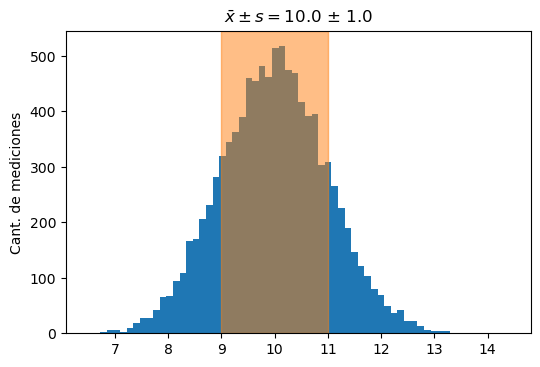

In [2]:
x = np.random.normal(loc=10, scale=1, size=10_000)

promedio, desv_est = x.mean(), x.std()

plt.hist(x, bins="fd")
plt.axvspan(promedio - desv_est, promedio + desv_est, color="C1", alpha=0.5)
plt.title(r"$\bar{x} \pm s =$" f"{promedio:.1f} ± {desv_est:.1f}")

plt.ylabel("Cant. de mediciones")

promedio, desv_est

que no captura todas las mediciones, sino una fracción de ellas.

Si una medición cae afuera de este intervalo, ¿"está mal"?

En realidad, la interpretación es que estamos aproximando nuestro histograma por una **distribución normal o *gaussiana***.

La gaussiana depende de **dos parámetros**: $\mu$ y $\sigma$, que podemos estimar como el promedio $\bar{x}$ y la desviación estandar $s$, respectivamente:

Text(0, 0.5, 'Densidad de frecuencia de mediciones')

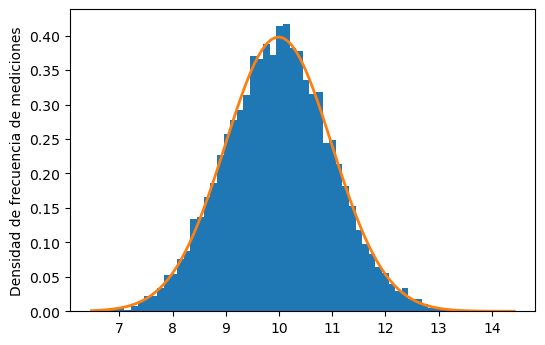

In [3]:
gaussiana = scipy.stats.norm(loc=x.mean(), scale=x.std())

t = np.linspace(x.min(), x.max(), 100)

plt.hist(x, bins="fd", density=True)
plt.plot(t, gaussiana.pdf(t), linewidth=2)

plt.ylabel("Densidad de frecuencia de mediciones")

que, como vemos, ajusta muy bien al histograma...

...pero, ¡porque los datos del histograma los sacamos de una distribución normal!

## Preguntas a responder

en esta primer parte:

1. ¿**De dénde sale** la normal o gaussiana? ¿Por qué es razonable pensar que nuestras **mediciones tendrán esta forma**?
2. ¿Qué **interpretación** le damos a las mediciones que caen más alla del intervalo $\bar{x} \pm s$?
3. ¿Por qué el promedio y la desviación estándar **tienen error**?
4. ¿**Qué reportamos** para una medición?
    - ¿Promedio y desviación estándar?
    - ¿Promedio y error del promedio?
    - ¿Desviación estándar y error de la desviación estandar?

# Introducción a probabilidades y estadística

## Variables aleatorias

El ejemplo más simple de una variable aleatoria es **el resultado arrojar una moneda**, que puede dar dos valores: **cara o ceca**, con un $50 \%$ de probabilidad para cada uno (si es una moneda *buena*).

En general, una variable aleatoria o estocástica es una cantidad cuyos valores varían cada vez que se la mide. Esta queda **completamente descripta por su distribución de probabilidad**, es decir, cual es la probabilidad que salga cada uno de los valores posibles que puede tomar.

### Distribución de Bernoulli

Es la generalización de la moneda, con probabilidad $p$ de que salga $1$ (cara), y $1-p$ de que salga $0$ (ceca).

Su distribución de probabilidad $P$ sería:

$$ P(k \,|\, p) = 
\begin{cases}
   1-p, &\quad\text{si }k=0\\
   p, &\quad\text{si }k=1\\
\end{cases} $$

O, en el caso de una moneda *común*, $p=0.5$:

$$ P(k \,|\, p=0.5) = 
\begin{cases}
   0.5, &\quad\text{si }k=0\\
   0.5, &\quad\text{si }k=1\\
\end{cases} $$

Podemos generar una variable aleatoria en Python:

In [5]:
moneda = scipy.stats.bernoulli(p=0.5)

Ver su distribución de probabilidad. con la **p**robability **m**ass **f**unction (pmf):

In [7]:
moneda.pmf(1)

0.5

Tomar muestras o realizar experimentos:

In [13]:
moneda.rvs(size=5)

array([0, 0, 1, 0, 1])

**Pregunta 1:**

¿Cómo podemos estimar su distribución de probabilidad?

In [18]:
np.bincount(moneda.rvs(size=1000))

array([515, 485])

**Pregunta 2:**

¿Cómo podemos estimar la probabilidad $p$ de que salga "cara" o $1$ (a partir de $N$ experimentos)?

In [40]:
x = moneda.rvs(size=10)

np.mean(x)

0.4

### Distribución uniforme discreta

Otra variable aleatoria simple con la que estamos familiarizados es **un dado** (de 6 caras).

El nombre técnico es variable uniforme discreta:
- Uniforme: todos los valores tienen la misma probabilidad
- Discreta: los valores son discretos (1, 2, 3, 4, 5, 6)

Esta la variante distribución uniforme continua, donde, por ejemplo, el resultado puede ser cualquier número real entre 0 y 1, con la misma (densidad de) probabilidad.

In [41]:
dado = scipy.stats.randint(low=1, high=7)

In [45]:
dado.rvs(size=5)

array([5, 1, 3, 1, 2])

0.16666666666666666

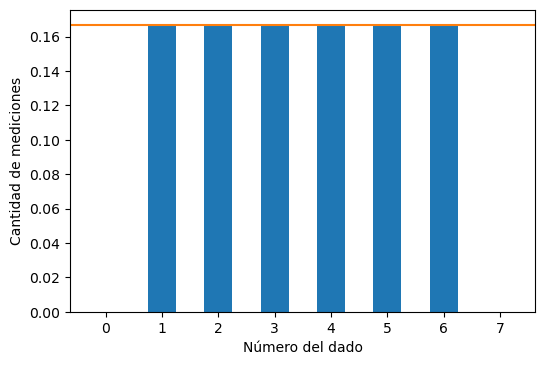

In [51]:
x = dado.rvs(size=1_000_000)
plt.hist(x, bins=np.arange(9), align="left", rwidth=0.5, density=True)

esperado = 1 / 6
plt.axhline(esperado, color="C1")
plt.xlabel("Número del dado")
plt.ylabel("Cantidad de mediciones")

1/6

## Promedio y desviación estándar

¿Podemos calcular el promedio de una **distribución de probabilidad**?

Imaginemos que tiramos un dado 7 veces y salen los siguientes números: ${1, 2, 2, 2, 4, 4, 6}$.

Calcular el promedio es sumarlos y dividir por la cantidad de números:

$$\begin{align}
\bar{x}
&= \frac{1 + 2 + 2 + 2 + 4 + 4 + 6}{7} \\
\text{sacando factor común} \\
&= \frac{ \Big( {1 \times 1 + 3 \times 2 + 2 \times 4 + 1 \times 6} \Big) }{7} \\
\text{distribuyendo la división} \\
&= {\frac{1}{7} \times 1 + \frac{3}{7} \times 2 + \frac{2}{7} \times 4 + \frac{1}{7} \times 6} \\
\text{fracciónes de veces} \\
&= {f_1 \times 1 + f_3 \times 2 + f_4 \times 4 + f_6 \times 6}
\end{align}$$

En otras palabras, el promedio es

$$ \bar{x} = \sum_i f_i \, x_i $$

donde $f_i$ es la fracción de veces que salió el número $i$-ésimo, y $x_i$ es el valor del número $i$-ésimo.

### Promedio teórico

Si tiramos muchas veces el dado, esperamos que los $f_i$ tiendan a la probabilidad que salga cada número: $p_i = \frac{1}{6}$.

Entonces, podemos definir el valor medio $\mu$, valor esperado o esperanza $E[X]$ de una variable aleatoria como:

$$ \mu = \sum_i p_i \, x_i $$

In [52]:
dado = scipy.stats.randint(low=1, high=7)

dado.mean()

3.5

Podemos **estimarlo** como el promedio de $N$ experimentos:

In [67]:
dado.rvs(size=10_000).mean()

3.5142

¡El promedio ("experimental") tiene un error!

Ya calculamos dicho error:

$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}} $$

Que el error depende de $N$ lo podemos ver fácilmente:

In [68]:
dado.rvs(size=100).mean()

3.52

¿Pero qué es $\sigma$?

### Desviación estándar teórica

Análogamente al promedio, se puede calcular la desviación estándar teórica:

$$ \sigma = \sqrt{\sum_i p_i \, (x_i - \mu)^2} $$

que **estimamos** como la desviación estándar *experimental*.

In [69]:
dado.std()

1.707825127659933

In [79]:
dado.rvs(size=10000).std()

1.7026120051262412

Entonces, el error del promedio lo estimamos experimentalmente así:

$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}} \quad\Rightarrow\quad s_{\bar{x}} = \frac{s}{\sqrt{N}} $$

donde reemplazamos $\sigma \mapsto s$.

Aunque técnicamente significan cosas distintas, en el laboratorio, vamos a usar $s$ o $\sigma$ intercambiablemente. (Si cursan estadística, no.)

## Álgebra de variables aleatorias

### Suma de dos dados

Si en lugar del resultado de tirar un dado, definimos como nuestra variable aleatoria la suma de los resultados de tirar 2 dados:

- ¿Qué forma tiene la distribución?
- ¿Cuál es el valor mínimo que puede tomar? ¿Y máximo?
- ¿Qué probabilidad tiene cada valor posible?

In [80]:
dado = scipy.stats.randint(low=1, high=7)

In [81]:
x = dado.rvs(size=(2, 5))

x

array([[2, 1, 6, 5, 3],
       [1, 4, 5, 4, 3]])

In [82]:
x.sum(0)

array([ 3,  5, 11,  9,  6])

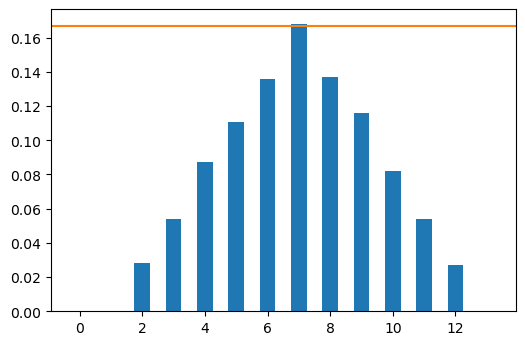

In [83]:
x = dado.rvs(size=(2, 10_000)).sum(0)

plt.hist(x, bins=np.arange(15), density=True, align="left", rwidth=0.5)
plt.axhline(1 / 6, color="C1")

### Suma de N dados

Análogamente, podemos simular la distribución de sumar $N$ dados.

In [85]:
dado = scipy.stats.randint(low=1, high=7)


@ipywidgets.interact(N=(1, 10))
def _(N=1):
    x = dado.rvs(size=(N, 10_000)).sum(0)
    plt.hist(x, bins=np.arange(7 * N + 2), density=True, align="left", rwidth=0.5)


    t = np.linspace(0, 7 * N + 2, 100)
    gaussiana = scipy.stats.norm(loc=x.mean(), scale=x.std())
    plt.plot(t, gaussiana.pdf(t))

interactive(children=(IntSlider(value=1, description='N', max=10, min=1), Output()), _dom_classes=('widget-int…

Rápidamente, tiende a una forma de campana. Podemos superponer una distribución normal a esta campana, para comparar.

Por más que nuestras mediciones no provengan de una distribución normal, generalmente podemos aproximarlas bien por una normal, ya que involucran múltiples fuentes de error.

## Distribución normal o gaussiana

La distribución normal tiene la siguiente forma funcional:

$$ N(x) \propto e^{-x^2} $$

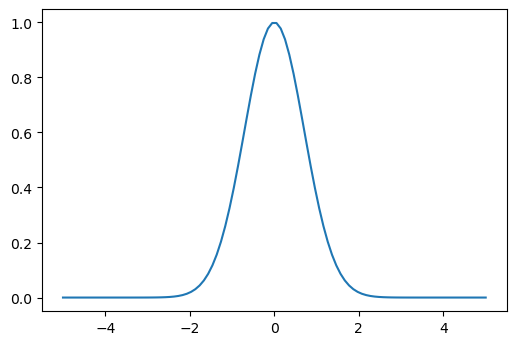

In [2]:
x = np.linspace(-5, 5, 100)
plt.plot(x, np.exp(-(x ** 2)))

que tiene un máximo en $x = 0$.

En general, se escribe con dos parámetros:

- $\mu$, que controla el centro de la distribución ($x \mapsto x - \mu$)
- $\sigma$, que controla el ancho de la distribución ($x \mapsto \frac{x}{\sigma}$)

y un factor $\frac{1}{2}$ en el exponente:

$$ N(x  \,|\,  \mu, \sigma) \propto \exp \left( \frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2 \right) $$

Además, la van a ver con un factor $\frac{1}{\sigma \sqrt{2\pi}}$, que es para que la distribución este normalizada (su integral sea 1):

$$ N(x \,|\, \mu, \sigma) =
\frac{1}{\sigma \sqrt{2\pi}} \;
e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} $$

Está incluida en Scipy como `scipy.stats.norm`.

In [3]:
@ipywidgets.interact(mu=(-5, 5), sigma=(0.4, 3, 0.3))
def _(mu=0, sigma=1):
    x = np.linspace(-5, 5, 100)
    plt.plot(
        x,
        scipy.stats.norm.pdf(x, loc=mu, scale=sigma),
    )
    plt.ylim(-0.1, 1.1)
    plt.xlabel("x")
    plt.ylabel("Densidad de probabilidad")
    plt.grid()

interactive(children=(IntSlider(value=0, description='mu', max=5, min=-5), FloatSlider(value=1.0, description=…

Podemos estimar $\mu$ y $\sigma$ como el promedio $\bar{x}$ y la desviación estándar $s$ de las muestras:

In [4]:
x = scipy.stats.norm(loc=10, scale=2).rvs(size=1000)

x.mean(), x.std()

(9.885667603130878, 1.978641510516687)

Sin embargo, no siempre tiene sentido resumir mediciones en promedio y desviación estandar (o, más general, centro y ancho).

### Distribución uniforme discreta

Si las mediciones fueran los números que salen al arrojar un dado, esperariamos un histograma donde todos los números del 1 al 6 tienen la misma probabilidad.

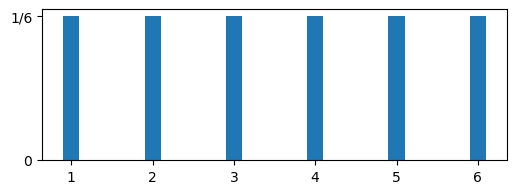

In [5]:
plt.figure(figsize=(6, 2))
plt.bar(np.arange(1, 7), 1 / 6, width=0.2)
plt.yticks((0, 1 / 6), labels=("0", "1/6"));

Pero nadie describiria las mediciones como el promedio y la desviación estandar: $3.5 \pm 1.7$, es decir, el intervalo $[1.8, 5.2]$.

### Distribución del diámetro

...medido de una manera particular. ¡Este "detalle" es **importantísimo**[1]! Hay que definir correctamente el **proceso que generó los datos**, es decir, como se midió.

Un buen método para medir el diámetro es apoyar la regla en un borde del circulo y pivotar la regla sobre ese punto, barriendo sobre borde del círculo hasta encontrar la longitud máxima.

Pero, si no seguimos este método, y apoyamos la regla en lo que creemos que es el diámetro, podríamos obtener la siguiente distribución de mediciones:

[1] pueden leer la paradoja de Bertrand: https://en.wikipedia.org/wiki/Bertrand_paradox_(probability). Ignoren el *Recent Developments*, lo que dijo Bertrand está bien. Otras paradojas en estadística también se dan cuando no se considera la forma en la que se generaron los datos, por ejemplo, la paradoja de Simpson: https://en.wikipedia.org/wiki/Simpson%27s_paradox. La solución a estos problemas está *fuera* de la estadística, en lo que se llama *inferencia causal*. Si les interesa, pueden leer los libros de Judea Pearl: "*Causal Inference in Statistics: A Primer*" o "*The Book of Why*".

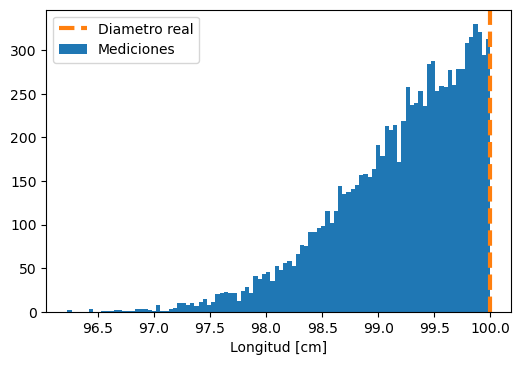

In [7]:
diametro_real = 100

diametros = np.random.normal(size=10_000)
diametros = diametro_real - np.abs(diametros)

plt.hist(diametros, bins="sqrt", label="Mediciones")
plt.axvline(
    diametro_real, color="C1", linestyle="--", linewidth=3, label="Diametro real"
)
plt.xlabel("Longitud [cm]")
plt.legend()

que no describiriamos como un centro y un ancho.

## Interpretación estadística

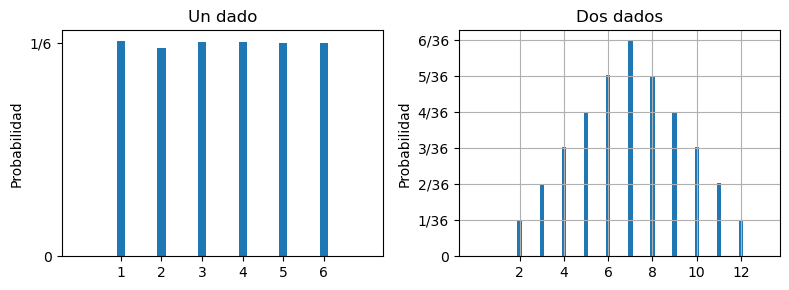

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].hist(
    np.random.randint(1, 7, size=100_000),
    bins=np.arange(9),
    density=True,
    align="left",
    rwidth=0.2,
)
ax[0].set(
    title="Un dado",
    ylabel="Probabilidad",
    xticks=np.arange(1, 7),
    yticks=(0, 1 / 6),
    yticklabels=(0, "1/6"),
)

ax[1].hist(
    np.random.randint(1, 7, size=(2, 100_000)).sum(0),
    bins=np.arange(15),
    density=True,
    align="left",
    rwidth=0.2,
)
ax[1].set(
    title="Dos dados",
    ylabel="Probabilidad",
    xticks=np.arange(2, 13, 2),
    yticks=np.arange(7) / 36,
    yticklabels=(0, *(f"{i}/36" for i in range(1, 7))),
)
ax[1].grid()

fig.tight_layout()

**Para 1 dado:**

¿Cuál es la probabilidad de que:
- salga 3?
- salgan 3 y 4?

**Para la suma de 2 dados:**

¿Cuál es la probabilidad de que:
- salga 2?
- salgan valores entre 6 y 8?

### Distribución normal o gaussiana

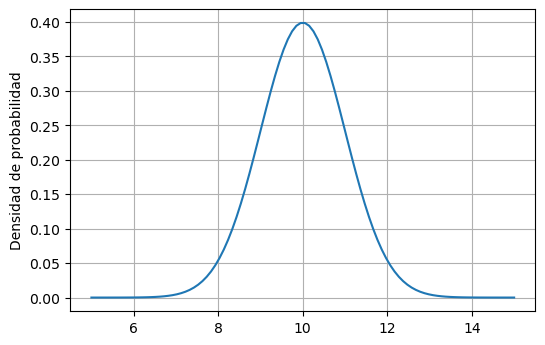

In [9]:
gaussiana = scipy.stats.norm(loc=10, scale=1)

t = np.linspace(5, 15, 100)
plt.plot(t, gaussiana.pdf(t))
plt.ylabel("Densidad de probabilidad")
plt.grid()

¿Cuál es la probabilidad de que salga 10?

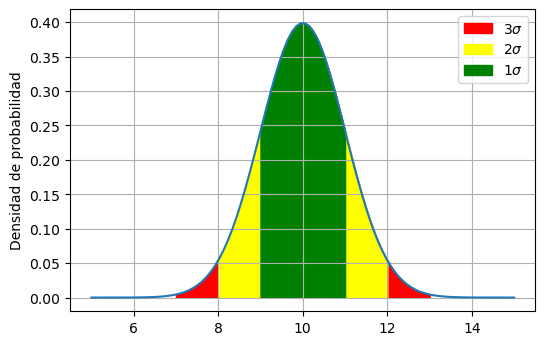

In [10]:
gaussiana = scipy.stats.norm(loc=10, scale=1)

t = np.linspace(5, 15, 100)
plt.plot(t, gaussiana.pdf(t))
for sigmas, color in [(3, "red"), (2, "yellow"), (1, "green")]:
    t = 10 + sigmas * np.linspace(-1, 1, 100)
    plt.fill_between(t, gaussiana.pdf(t), color=color, label=f"${sigmas}\\sigma$")

plt.legend()
plt.ylabel("Densidad de probabilidad")
plt.grid()

El area verde corresponde a $\mu \pm \sigma$ y su integral vale ~68%.

Si sumamos el area amarilla, $\mu \pm 2 \sigma$ y su integral vale ~95%.

E incluyendo el area roja, $\mu \pm 3 \sigma$ y su integral vale ~99%.

Entonces, si una medición no cae dentro de $\bar{x} \pm \sigma$, no significa que "este mal". Pasa $1/3$ de las veces.

Ahora, si una medición cae a más de $3 \sigma$ del valor esperado, ya sospechamos fuertemente que no es consistente.

En física de particulas, se usa $5 \sigma$ como criterio, que equivale a 99.99994%. Caer fuera de dicho intervalo por azar debería pasar una cada un millón de intentos.

## Interpretación física

Vimos que hay diferentes "mediciones" que podemos hacer sobre las mediciones (o datos):

- promedio
- desviación estándar
- error del promedio
- error de la desviación estandar

pero, ¿cuál usamos?

La respuesta a esta pregunta no la da la estadística. La estadística les da herramientas para analizar los datos, pero no les dice que herramienta usar ni que concluir. Es importante **interpretarlos en base a nuestro experimento**. Hay que entender **de donde vienen** los datos, cuál es **el proceso que los generó**. Y de ahí, **qué se quiere describir**: ¿el centro de la distribución, o una medición cualquiera?

Entonces, imaginemos ejemplos:

### Altura de las personas

Imaginemos que medimos a $N$ personas, armamos un histograma:

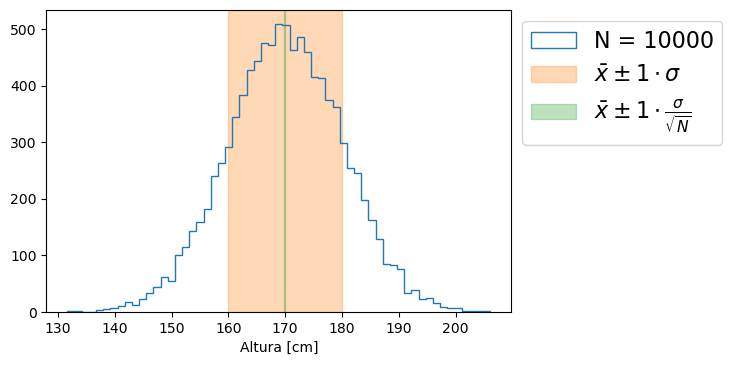

In [11]:
x = np.random.normal(170, 10, size=10_000)

promedio = x.mean()
desv_est = x.std()
err_prom = x.std() / x.size ** 0.5
err_desv_est = x.std() / (2 * (x.size - 1)) ** 0.5

plt.hist(x, bins="fd", histtype="step", label=f"N = {x.size}")

n_sigmas = 1

plt.axvspan(
    promedio - n_sigmas * desv_est,
    promedio + n_sigmas * desv_est,
    color="C1",
    alpha=0.3,
    label=rf"$\bar{{x}} \pm {n_sigmas} \cdot \sigma$",
)

plt.axvspan(
    promedio - n_sigmas * err_prom,
    promedio + n_sigmas * err_prom,
    color="C2",
    alpha=0.3,
    label=r"$\bar{x} \pm" + str(n_sigmas) + r"\cdot \frac{\sigma}{\sqrt{N}}$",
)

plt.xlabel("Altura [cm]")
plt.legend(fontsize=16, bbox_to_anchor=(1, 1))

¿Qué reportaría?

In [12]:
print(f"      Promedio ± Desv. Estandar       = {promedio:.2f} ± {desv_est:.2f}")
print(f"      Promedio ± Error promedio       = {promedio:.2f} ± {err_prom:.2f}")
print(f"Desv. Estándar ± Error Desv. Estandar = {desv_est:.2f} ± {err_desv_est:.2f}")

      Promedio ± Desv. Estandar       = 169.96 ± 10.05
      Promedio ± Error promedio       = 169.96 ± 0.10
Desv. Estándar ± Error Desv. Estandar = 10.05 ± 0.07


Hay que hacer una pregunta más especifica, entender para que lo vamos a user:

Queremos diseñar los colectivos tal que el 68% de la gente se pueda sentar cómoda.

### Altura de una persona

Ahora imaginemos que definimos un protocolo para medir el torso. Medimos muchas veces y armamos nuevamente un histograma:

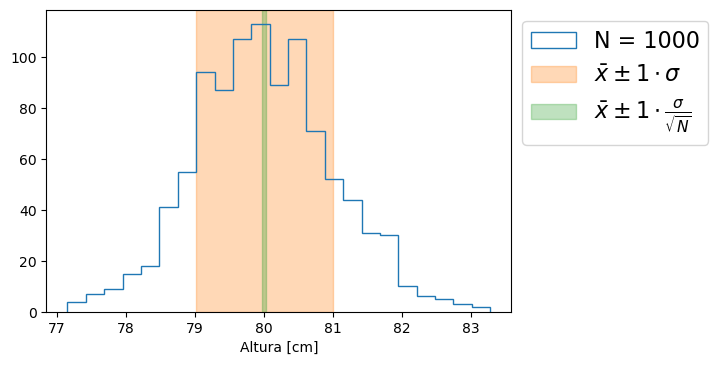

In [13]:
x = np.random.normal(80, 1, size=1_000)

promedio = x.mean()
desv_est = x.std()
err_prom = x.std() / x.size ** 0.5
err_desv_est = x.std() / (2 * (x.size - 1)) ** 0.5

plt.hist(x, bins="fd", histtype="step", label=f"N = {x.size}")

n_sigmas = 1

plt.axvspan(
    promedio - n_sigmas * desv_est,
    promedio + n_sigmas * desv_est,
    color="C1",
    alpha=0.3,
    label=rf"$\bar{{x}} \pm {n_sigmas} \cdot \sigma$",
)

plt.axvspan(
    promedio - n_sigmas * err_prom,
    promedio + n_sigmas * err_prom,
    color="C2",
    alpha=0.3,
    label=r"$\bar{x} \pm" + str(n_sigmas) + r"\cdot \frac{\sigma}{\sqrt{N}}$",
)

plt.xlabel("Altura [cm]")
plt.legend(fontsize=16, bbox_to_anchor=(1, 1))

¿Que reportaría?

In [14]:
print(f"      Promedio ± Desv. Estandar       = {promedio:.2f} ± {desv_est:.2f}")
print(f"      Promedio ± Error promedio       = {promedio:.2f} ± {err_prom:.2f}")
print(f"Desv. Estándar ± Error Desv. Estandar = {desv_est:.2f} ± {err_desv_est:.2f}")

      Promedio ± Desv. Estandar       = 80.00 ± 0.99
      Promedio ± Error promedio       = 80.00 ± 0.03
Desv. Estándar ± Error Desv. Estandar = 0.99 ± 0.02


1. Quiere hacerle un traje a esta persona, ¿cuánto mide su torso?

2. El sastre quiere usar este protocolo para medir a otra persona, ¿qué error cometerá?

## Mediciones del metrónomo

Código: https://colab.research.google.com/drive/149iu_xZMYZk8Zh7Cb1pT6DG-cPhScGWy

### Periodo del metrónomo

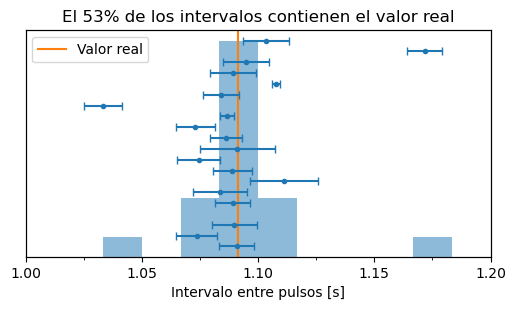

Cada barra representa proviene de las medciiones de algunes de ustedes.

Si estoy comparando con el valor real del periodo (naranja), ¿cómo creen que calculé cada valor con su barra de error?

### Tiempos de respuesta

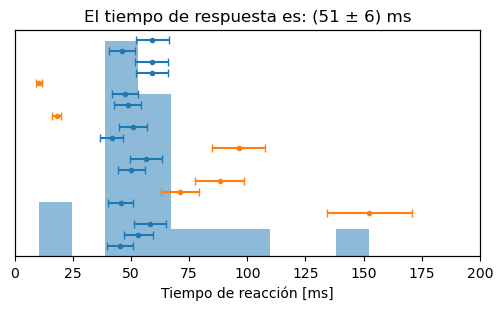

Acá estoy mostrando evaluando el sus tiempos de respuesta.

¿Cómo creen que calculé cada valor con su barra de error?

¿Y el valor global que pongo en el título?

# Preguntas para responder en Discord

1. Basandonos en los experimentos de la clase anterior, como medida del error de una medición del periodo, usaria:
    - El error instrumental del cronómetro
    - La desviación estándar de los periodos
    - La desv. estándar dividido raiz(N) (error del promedio)

2. Para reportar el intervalo donde esperan que caigan el 68% de mediciones, usaria:
    - Promedio ± Desv. estándar
    - Promedio ± Error del proemdio
    - Desv. estándar ± Error de la desv. estándar
    
3. Para reportar el intervalo donde cree que está el periodo real, usaria:
    - Promedio ± Desv. estándar
    - Promedio ± Error del proemdio
    - Desv. estándar ± Error de la desv. estándar
    
4. Para comparar las precisiones entre los metodos "centro" y "extremo", usaria:
    - Promedio ± Desv. estándar
    - Promedio ± Error del promedio
    - Desv. estándar ± Error de la desv. estándar